### Bag of Words (BoW)
The "bag of words" (BoW) model is a commonly used technique in natural language processing (NLP) and information retrieval. It represents a document as an **unordered set of words , disregarding grammar and word order** but keeping track of **word frequency.** In this model, a text (such as a document or a sentence) is represented as a "bag" (multiset) of its words, disregarding grammar and word order but keeping track of the frequency of each word.

Since BoW doesn't care about worder order and context the following sentences would be equal:
- "It's not good it's bad!"
- "It's not bad, it's good!"

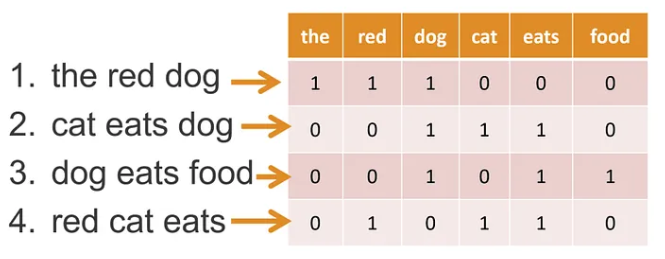

However, the text usually not clean and may contain duplicates, punctuation, mistakes and etc. Before applying BoW, you have to **preprocess the data**. Here are the main steps to follow:
1. Lower case and punctuation removal
2. Stop words definition and removal. Depending on your task define the words that don't have any value/meaning
3. Apply stemming or lemmatization (optional)
4. Tokenization and Vectorization

**Pros**
- Easy to implement and apply
- Relatively fast preprocessing
- Using TF-IDF or N-grams can improve the performance (capture more context)

**Cons**
- Huge corpus usually leads to huge vocabulary size (million of words). Event *sparce* format may not help, only *hashing*
- Doesn't consider word order, N-grams partially help solving the issue but not completely ('not like' -> 'not_like')

### What is Tokenization?
Tokenization is the process of breaking down a text or a sequence of characters into units called tokens. These tokens are typically words, phrases, symbols or other meaningful elements that form the basic building blocks for NLP and text analysis.

It's always the first step in text preprocessing. Text is much better analyze using tokens instead of raw symbols or sentences. Besides, **ML-models use tokens as features to make predictions.**

**Tokenization can be performed at different levels, leading to different types of tokens:**
- `Word Tokenization:` text into words (most common type)
- `Sentence Tokenization:` text into sentences
- `Character Tokenization:` text into individual characters.
- `Subword Tokenization:` Breaking text into smaller linguistic units, such as subwords or morphemes. This can be useful for handling rare words or languages with complex morphology.

In [94]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')  # download the Punkt tokenizer models

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vlad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
text = "Tokenization is usually the first step in text preprocessing. Remember it!"

# apply different types of tokenization
word_tokens = word_tokenize(text)
sentence_tokens = sent_tokenize(text)
character_tokens = list(text)

print('Word Tokenization: ', word_tokens)
print('Sentence Tokenization: ', sentence_tokens)
print('Character Tokenization: ', character_tokens[:10])

Word Tokenization:  ['Tokenization', 'is', 'usually', 'the', 'first', 'step', 'in', 'text', 'preprocessing', '.', 'Remember', 'it', '!']
Sentence Tokenization:  ['Tokenization is usually the first step in text preprocessing.', 'Remember it!']
Character Tokenization:  ['T', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i']


- since we tokenized the raw text `dot` was considered as a token as well

### Stemming and Lemmatization
Stemming and lemmatization are two common techniques in NLP that aim to reduce words to their base or root form, making it **easier to analyze and compare different forms of words.** Both techniques are used to normalize words by stripping away inflections or derivations.

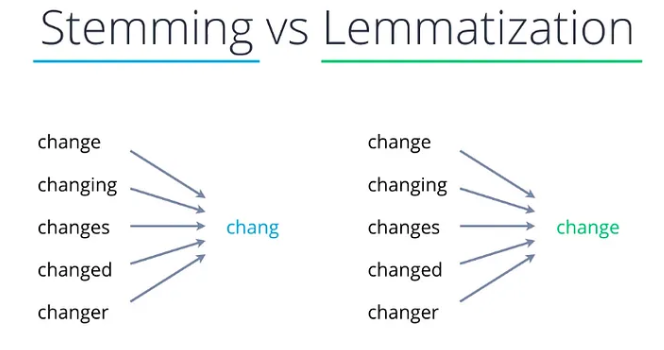


### Stemming and its Challenges
Stemming is a process where words are reduced to their root or base form by removing *prefixes* or *suffixes.* The goal is to **reduce words to a common form so that different variations of a word are treated as the same.**

Stemming may not always result in a valid word and has issues like **understamming** and **overstamming**

**Overstamming**

Occurs when **too much of a word is cut off.** This can lead to meaningless words or to the fact that **completely unrelated words will be reduced to the same basis.** For example:
- `university -> univers`
- `universal -> univers` 
- `universities -> univers`
- `universe -> univers`

**Understamming**

**The same stem despite different meanings.** Occurs when we have **multiple words that are actually forms of each other.** It would be nice if they were all “resolved” into one tree of related words, but, unfortunately, this does not happen. For example: 
- `data -> dat`
- `datum -> datu` 

Creating a good stemming algorithm is tricky task.

### Stemming Algorithms
There are many stemming algorithms. Let's take a look at some of them:
- `Porter Stemmer:` removes common words endings, old method from 1980s
- `Snowball Stemmer:` modification of Porter Stemmer
- `Lancaster Stemmer:` allows includeing own rules. The main issue - aggressive and can output weird words

In [96]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

In [97]:
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer(language='english')
lancaster_stemmer = LancasterStemmer()

words_1 = [
    'program',
    'programs',
    'programmer',
    'programming',
    'programmers'
]

words_2 = [
    'university',
    'universal',
    'universities',
    'universe'    
]

In [98]:
# Porter Stemmer
for word in words_1: print(word, ':', porter_stemmer.stem(word))
print()
for word in words_2: print(word, ':', porter_stemmer.stem(word))

program : program
programs : program
programmer : programm
programming : program
programmers : programm

university : univers
universal : univers
universities : univers
universe : univers


In [99]:
# Snowball Stemmer
for word in words_1: print(word, ':', snowball_stemmer.stem(word))
print()
for word in words_2: print(word, ':', snowball_stemmer.stem(word))

program : program
programs : program
programmer : programm
programming : program
programmers : programm

university : univers
universal : univers
universities : univers
universe : univers


In [100]:
# Lancaster Stemmer
for word in words_1: print(word, ':', lancaster_stemmer.stem(word))
print()
for word in words_2: print(word, ':', lancaster_stemmer.stem(word))

program : program
programs : program
programmer : program
programming : program
programmers : program

university : univers
universal : univers
universities : univers
universe : univers


### Lemmatization
Lemmatization **is a more advanced technique** that involves reducing words to their base or dictionary form, known as the lemma. Lemmatization **considers the context of the word** and applies morphological analysis to obtain the root form. Unlike stemming, lemmatization **typically results in valid words.** However, it's more computationally expensive rather than stemming.

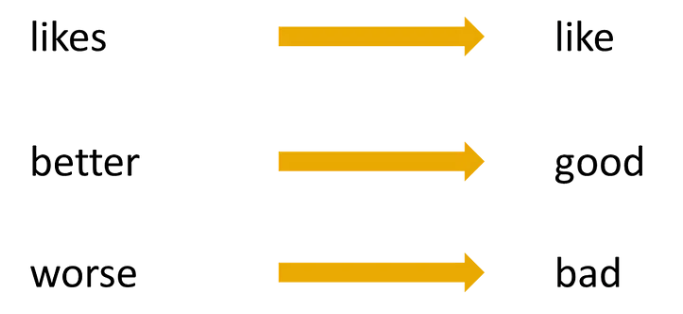

In [101]:
from nltk.stem import WordNetLemmatizer

In [102]:
lemmatizer = WordNetLemmatizer()

for word in words_1: print(word, ':', lemmatizer.lemmatize(word))
print()
for word in words_2: print(word, ':', lemmatizer.lemmatize(word))

program : program
programs : program
programmer : programmer
programming : programming
programmers : programmer

university : university
universal : universal
universities : university
universe : universe


- The context is preserved
- Not only words but also sentences can be lemmantized

### Bag of Words Model
To get the BoW we need:
1. Get vocabulary (unique words/tokens from all documents)
2. Get vocabulary counts for each document

**Spooky Author Identification**

The main idea of this competition is to identify author based on text. Before applying BoW model we will apply preprocessing that will include:
- punctiation removal
- stop words removal
- stemming or lemmatization

In [111]:
import pandas as pd
import re

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from typing import Any

In [112]:
# preprocessing functions

def remove_punctuation(text: str) -> str:
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def remove_stopwords(text: str, sw: list) -> str:
    sw = set(sw) # faster to look up
    text = [
        word.lower() for word in text.split() if word.lower() not in sw
    ]
    return " ".join(text)


def remove_numbers(text: str):
    text = [
        re.sub(r'\d+(?:\.\d+)?', '', word) for word in text.split()
    ]
    return " ".join(text)


def stem_text(text: str, stemmer: Any) -> str:
    text = [
        stemmer.stem(word) for word in text.split()
    ]
    return " ".join(text)


def lemmatize_text(text: str, lemmatizer: Any) -> str:
    text = [
        lemmatizer.lemmatize(word) for word in text.split()
    ]
    return " ".join(text)


def get_top_words(vocab: dict, n: int = 10, ascending: bool = False) -> pd.Series:
    """
    Get N top words from word counts (words distribution).

    Parameters
    ----------
    vocab: dict
        Word counts (e.g. {'sunny': 10, 'big': 23}).
    n: int
        Number of words to show (e.g. 10 -> top 10).
    ascending: bool
        If True, show in ascending order.

    Returns
    -------
    pd.DataFrame
        Word counts.

    """
    if ascending:
        result = pd.Series(vocab).sort_values()
    else:
        result = pd.Series(vocab).sort_values(ascending=False)
    return result.iloc[:n]

In [113]:
data = pd.read_csv(r'../../data/spooky-author-identification/train.csv')
print('Data Shape: ', data.shape[0])

data.head()

Data Shape:  19579


,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


**Text Preprocessing**

In [114]:
# punctuation removal
text = data['text'].iloc[0]

print('With Punctuation: \n', text)

clean_text = remove_punctuation(text)
print('\nNo Punctuation: \n', clean_text)

With Punctuation: 
 This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.

No Punctuation: 
 This process however afforded me no means of ascertaining the dimensions of my dungeon as I might make its circuit and return to the point whence I set out without being aware of the fact so perfectly uniform seemed the wall


In [115]:
# stop words removal
sw = stopwords.words('english')
clean_text = remove_stopwords(clean_text, sw)

print('\nNo Stop Words: \n', clean_text)


No Stop Words: 
 process however afforded means ascertaining dimensions dungeon might make circuit return point whence set without aware fact perfectly uniform seemed wall


In [116]:
# stemmed text
snowball_stemmer = SnowballStemmer(language='english')

stemmed_text = stem_text(clean_text, snowball_stemmer)
print('Stemmed Text: \n', stemmed_text)

Stemmed Text: 
 process howev afford mean ascertain dimens dungeon might make circuit return point whenc set without awar fact perfect uniform seem wall


In [117]:
# lemmatized text
lemmatizer = WordNetLemmatizer()

lemmatized_text = lemmatize_text(clean_text, lemmatizer)
print('Lemmatized Text: \n', stemmed_text)

Lemmatized Text: 
 process howev afford mean ascertain dimens dungeon might make circuit return point whenc set without awar fact perfect uniform seem wall


- **let's apply these preprocesing transformation on all data**

In [118]:
# remove punctuation
data_clean = data['text'].apply(remove_punctuation).to_frame()

# remove stop words
data_clean = data_clean['text'].apply(remove_stopwords, args=(sw, )).to_frame()

In [119]:
# stemmed and lemmatized text
data_stemmed = data_clean['text'].apply(stem_text, args=(snowball_stemmer, )).to_frame()

data_lemmatized = data_clean['text'].apply(lemmatize_text, args=(lemmatizer, )).to_frame()

In [120]:
# compare some preprocessed text (lemmatization vs Stemming)
text_indx = 23

print('Original Text: \n', data['text'].iloc[text_indx])
print('\nClean Stemmed Text: \n', data_stemmed.iloc[text_indx][0])
print('\nClean Lemmatized Text: \n', data_lemmatized.iloc[text_indx][0])

Original Text: 
 With how deep a spirit of wonder and perplexity was I wont to regard him from our remote pew in the gallery, as, with step solemn and slow, he ascended the pulpit This reverend man, with countenance so demurely benign, with robes so glossy and so clerically flowing, with wig so minutely powdered, so rigid and so vast, could this be he who, of late, with sour visage, and in snuffy habiliments, administered, ferule in hand, the Draconian laws of the academy?

Clean Stemmed Text: 
 deep spirit wonder perplex wont regard remot pew galleri step solemn slow ascend pulpit reverend man counten demur benign robe glossi cleric flow wig minut powder rigid vast could late sour visag snuffi habili administ ferul hand draconian law academi

Clean Lemmatized Text: 
 deep spirit wonder perplexity wont regard remote pew gallery step solemn slow ascended pulpit reverend man countenance demurely benign robe glossy clerically flowing wig minutely powdered rigid vast could late sour visage

- We see how lemmatization is better than simple stemming (e.g. perplexity -> perplex vs perplexity,  gallery -> galleri vs gallery, etc).

**Bag of Words Model / Count Vectorizer**

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
vectorizer = CountVectorizer()

# get Bag of Words (BoW) using CountVectorizer
bow_features = vectorizer.fit_transform(data_lemmatized['text'])
bow_features

<19579x22201 sparse matrix of type '<class 'numpy.int64'>'
	with 249075 stored elements in Compressed Sparse Row format>

In [123]:
# can look at dense matrix
bow_array = bow_features.todense()

pd.DataFrame(bow_array).head(10)

,0,1,2,3,4,5,6,7,8,9,...,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Important**
- results is usually a sparse matrix
- we have 22201 unique tokens that are used as features
- **feature matrix stores indexes in columns not words**
    - this is an issue since we additionally store vocabularly (see `HashingVectorizer`)
- **custom stop words, tokenizer and preprocessing can be passed in as an argument**

In [124]:
bow_array = bow_features.toarray()
features = vectorizer.get_feature_names_out()

# first 10 features
print(features[:10])

['aaem' 'ab' 'aback' 'abaft' 'abandon' 'abandoned' 'abandoning'
 'abandonment' 'abaout' 'abased']


### Custom Tokenization and Preprocessing
- By default tokenization in `CountVectorizer` removes all special characters, punctuation and single characters, lowers text. We can define custom tokenization and preprocessing pipeline and feed it in as parameters.

**Custom Tokenization**

let's define a custom tokenizer that saves punctuation and special characters, makes tokenization only on whitespaces.

In [125]:
import re
from scipy.sparse.csr import csr_matrix

def my_tokenizer(text: str):
    # create a space between special characters to take them as tokens
    text = re.sub("(\\W)", " \\1 ", text) # 'process,' -> 'process ,'
    return re.split("\\s+", text)  # split based on whitespace


def get_pd_fm(sparce_matrix: csr_matrix, vectorizer: Any) -> pd.DataFrame:
    """
    Transforms Sparse CSR matrix into Pandas dense with feature names in columns.

    Parameters
    ----------
    sparce_matrix
        Sparce matrix of features.
    vectorizer: Any
        Used vectorizer for features generation (e.g. 'CountVectorizer', ...).
    
    Returns
    -------
    pd.DataFrame
        Pandas dense matrix of features.
    """
    return pd.DataFrame(
        data=sparce_matrix.todense(),
        columns=vectorizer.vocabulary_.keys()
    )

In [126]:
# let's take a look at vectorization using custom tokenizer
text = data['text'].iloc[0]
text

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [73]:
vectorizer = CountVectorizer(
    tokenizer=my_tokenizer
)

text_features = vectorizer.fit_transform([text])
text_features

<1x39 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [74]:
text_features_df = get_pd_fm(text_features, vectorizer)
text_features_df

,this,process,",",however,afforded,me,no,means,of,ascertaining,...,being,aware,fact,so,perfectly,uniform,seemed,wall,.,
0,1,4,1,2,1,1,1,1,1,1,...,1,1,1,4,1,1,1,1,1,1


- Punctuation was tokenized as well 

**Custom Preprocessing**

Let's unite all our previous preprocessing funtion into a single one

In [127]:
def custom_preprocessor(text: str) -> str:
    """Basic preprocessing for text."""
    # 1. remove punctuation
    import string
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # 2. remove stopwords
    sw = set(stopwords.words('english'))
    text = [
        word.lower() for word in text.split() if word.lower() not in sw
    ]
    text = " ".join(text)
    
    # 3. lemmatize text
    lemmatizer = WordNetLemmatizer()
    text = [
        lemmatizer.lemmatize(word) for word in text.split()
    ]
    text = " ".join(text)
    return text

In [128]:
# select another text (single document, original text)
text = data['text'].iloc[3]
text

'How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.'

In [129]:
# this is how the text is going to be preprocessed
custom_preprocessor(text)

'lovely spring looked windsor terrace sixteen fertile county spread beneath speckled happy cottage wealthier town looked former year heart cheering fair'

In [130]:
# put all pieces together
vectorizer = CountVectorizer(
    preprocessor=custom_preprocessor
)

text_features = vectorizer.fit_transform([text])
text_features

<1x20 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [131]:
# preprocessed BoW features
text_features_df = get_pd_fm(text_features, vectorizer)
text_features_df

,lovely,spring,looked,windsor,terrace,sixteen,fertile,county,spread,beneath,speckled,happy,cottage,wealthier,town,former,year,heart,cheering,fair
0,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1


**Limiting Vocabulary Size**

When your feature space gets too large, you can limit its size by putting a restriction on the vocabulary size. If we set parameter `max_features=10`, it will keep only top 10 most frequent tokens and drop the rest.


**Ignore Counts and Use Binary Values**

You can choose to just use **presence or absence of a term instead of the raw counts.** This is useful in some tasks such as certain features in text classification where the frequency of occurrence is insignificant. To get binary values instead of counts all you need to do is set `binary=True.`


**Top 10 Most Used Words**
- `vectorizer.vocabulary_`: to get info about vocabulary distribution

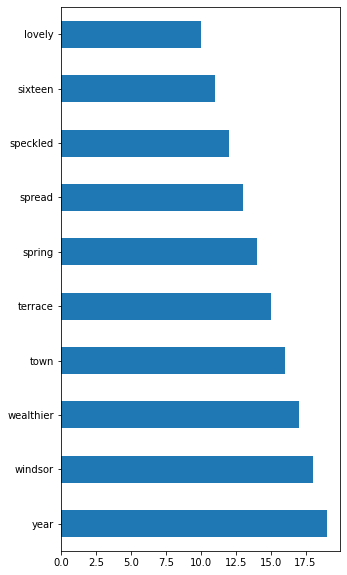

In [132]:
vocab = vectorizer.vocabulary_

top_words = get_top_words(vocab, n=10, ascending=False)
top_words.plot(kind='barh', figsize=(5,10));

**Important**
- We can define `max_df` and `min_df` to ignore words with too big and too smal frequency
- Only applies lowercase, no punctuation removal
- Accepts stop words for preprocessing
- Accepts custom tokenizer

More here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

### TF-IDF
TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic used in NLP to evaluate the importance of a word in a document relative to a collection of documents (corpus). Calculation is based on 2 values:
- `Term Frequency (TF)`
    - Measures how often a term occurs in a document. It's calculated as the ratio of the number of times a term appears in a document to the total number of terms in the document. The idea is to give **higher weight to terms that appear more frequently in the document.**
- `Inverse Document Frequency (IDF)`
    - Measures how important a term is across the entire corpus. **Terms that appear in many documents are considered less important, while terms that appear in fewer documents are considered more important.** IDF is calculated as the logarithm of the ratio of the total number of documents in the corpus to the number of documents containing the term, with 1 added to the denominator to avoid division by zero.

`TF-IDF(t,d,D) = TF(t,d) × IDF(t,D)`

### Why TF-IDF is Better?
The issue with simple counts is that some words like `"the"` will appear many times and their large counts will not be very meaningful in the encoded vectors:
- Term Frequency summarizes how often a given word appears within a document
- Inverse Document Frequency downscales words that appear many times across all documents

TF-IDF scores try to **highlight words that are more frequent in a document but not across documents:**
- `Zero TF-IDF value:` a term appears several or 0 times in a particular document and many times in all other documents
- `High TF-IDF value:` a term appers many times in a document and several times in all other documents

### TF-IDF Features / Matrix

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [134]:
# TF-IDF vectoriation
tfidf_vectorizer = TfidfVectorizer()

tfidf_features = tfidf_vectorizer.fit_transform(data_lemmatized['text'])
tfidf_features

<19579x22201 sparse matrix of type '<class 'numpy.float64'>'
	with 249075 stored elements in Compressed Sparse Row format>

- results is usually a sparse matrix
- we have 22201 unique word that is used as feature

In [135]:
# can look at dense matrix of TF-IDF
tfidf_array = tfidf_features.todense()

pd.DataFrame(tfidf_array).head(10)

,0,1,2,3,4,5,6,7,8,9,...,22191,22192,22193,22194,22195,22196,22197,22198,22199,22200
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.261661,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
# can use the same operations like in CountVectorier
tfidf_array = tfidf_features.toarray()
features = tfidf_vectorizer.get_feature_names_out()

# first 10 features
print(features[:10])

['aaem' 'ab' 'aback' 'abaft' 'abandon' 'abandoned' 'abandoning'
 'abandonment' 'abaout' 'abased']


In [137]:
# to get only idf
tfidf_vectorizer.idf_

array([10.18911674, 10.18911674,  9.78365163, ..., 10.18911674,
       10.18911674, 10.18911674])

### IDF Values

In [138]:
top_idf = pd.Series(
    data=tfidf_vectorizer.idf_,
    index=tfidf_vectorizer.vocabulary_.keys()
).sort_values(ascending=True).iloc[:10]

top_idf

immovable     3.567711
eleventh      3.733132
anothers      3.759397
bugbear       3.848757
bass          4.140563
westerner     4.286483
coherent      4.339792
tow           4.339792
entrusting    4.341234
guise         4.351386
dtype: float64

- these words probably **appear in each and every document.** That's why they have little IDF values
- the lower the IDF value of a word, the less unique it is to any particular document
- tokens with high TF-IDF scores are important since they allow distinguish different documents or target classes

### How to Get TF-IDF Values of a Text?
We need to select a certain text and apply tf-idf vectorization

In [139]:
doc_index = 0
document_tfidf_vector = tfidf_array[doc_index, :]

document_tfidf_vector = pd.DataFrame(
    data=document_tfidf_vector,
    index=features,
    columns=['tfid']
)

In [140]:
# exclude words with 0
document_tfidf_vector = document_tfidf_vector[document_tfidf_vector['tfid'] != 0]
document_tfidf_vector.sort_values(by=['tfid'], ascending=False).T

,ascertaining,uniform,circuit,dungeon,process,whence,dimension,perfectly,afforded,aware,...,return,fact,mean,wall,point,make,however,without,seemed,might
tfid,0.29896,0.282161,0.276165,0.271095,0.253369,0.2483,0.247146,0.239133,0.237402,0.224922,...,0.18957,0.187288,0.178336,0.178197,0.177919,0.168389,0.164677,0.164127,0.151527,0.148174


- The more common the word across documents, the lower its score and the more unique a word is to our first document (e.g. ‘had’ and ‘tiny’) the higher the score. So it’s working as expected except for the mysterious a that was chopped off.

### How to Get Keywords of a Text?
`TF-IDF` can be used to extract keywords. First, we have to fit our `TF-IDF` vectorizer and then apply it on a text using `transform` method. Then if we sort obtained `TF-IDF` scores, we get keywords.

In [141]:
# find the lengthiest text and extract keywords
data_lemmatized['length'] = data_lemmatized['text'].apply(lambda x: len(x))

sample_text = data_lemmatized[
    data_lemmatized['length'] == max(data_lemmatized['length'])
]['text'].iloc[0]

sample_text

'diotima approached fountain seated mossy mound near disciple placed grass near without noticing sat close continued discourse addressing happened one listener attempt repeat word describe chief appeared wish principally impress one woman year age full enjoyment exquisite beauty golden hair floated ringlet shoulder hazle eye shaded heavy lid mouth lip apart seemed breathe sensibility appeared thoughtful unhappy cheek pale seemed accustomed suffer lesson heard word wisdom ever listened youth beside far different aspect form emaciated nearly shadow feature handsome thin worn eye glistened animating visage decay forehead expansive doubt perplexity look seemed say although sought wisdom got entangled mysterious maze vain endeavoured extricate diotima spoke colour went came quick change flexible muscle countenance shewed every impression mind received seemed one life studied hard whose feeble frame sunk beneath weight mere exertion life spark intelligence burned uncommon strength within lif

In [142]:
dense_matrix = tfidf_vectorizer.transform([sample_text]).todense()
top_k = 10

tfidf_keywords = pd.DataFrame(
    data=dense_matrix,
    columns=features,
    index=['tf_idf']
).T

key_words = tfidf_keywords[tfidf_keywords['tf_idf'] != 0].sort_values('tf_idf', ascending=False)
key_words.head(top_k)

,tf_idf
seemed,0.186615
multitude,0.169576
word,0.168933
diotima,0.155119
evil,0.138505
animated,0.136896
deep,0.130668
wisdom,0.126693
earth,0.118576
world,0.118358


- qulaity can be futher improved by adding more stop wods

### What is the Difference between TF-IDF Vectorizer and TF-IDF Transformer?
Both are used to calculate TF-IDF values with the foollowing difference:
- TF-IDF Transformer is used after applying `CountVectorizer`
- TF-IDF Vectorizer combines functionality of both (token counts and vectorization)

In [143]:
bow_features = vectorizer.fit_transform(data_lemmatized['text'])
bow_features

<19579x22180 sparse matrix of type '<class 'numpy.int64'>'
	with 248957 stored elements in Compressed Sparse Row format>

**Converting BoW Features into TF-IDF Features**

Features from `CountVectorizer` can be easily transformed into `TF-IDF`

In [144]:
tfidf_transformer = TfidfTransformer()

tfidf_features = tfidf_transformer.fit_transform(bow_features)
tfidf_features

<19579x22180 sparse matrix of type '<class 'numpy.float64'>'
	with 248957 stored elements in Compressed Sparse Row format>

**Important**
- `CountVectorizer` and `TfidfVectorizer` share the same API

More info: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

### What is Hashing Vectorizer?
A limitation with `CountVectorizer` and `TfidfVectorizer` is that the encoded vector is returned with a length of the entire vocabulary.
Because these vectors contains a lot of zeros (sparse), vocabulary can become very large. We store the vocabularly to match the word/token with feature matrix. 

It leads to large memory consumption and slow downs algorithms predictions and training.

**Count and TF-IDF Vectorizers**

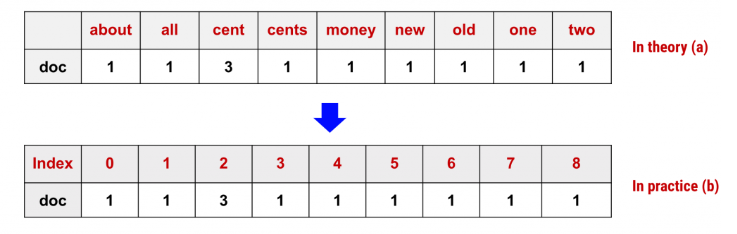


**Hashing Vectorizer**

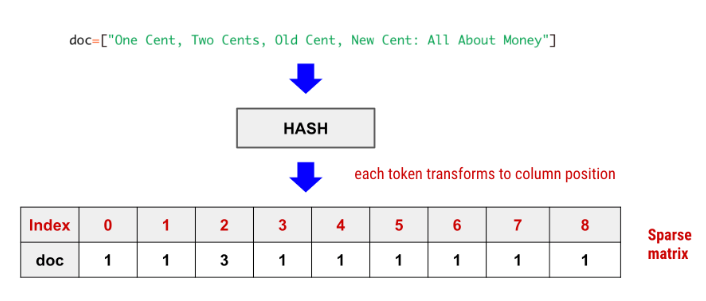

`HashingVectorizer` **doesn't store the resulting vocabularly** and uses a one way hash of words to convert them to integers.

**Advantages**
- scalable to large data (300M tokens and even more)
- fast to deploy and use for predictions
- can be used in a streaming (partial fit) or parallel pipeline as there is no state computed during fit


**Dowsides:**
- the hash is a one-way function (there is **no way to convert the encoding back**)
- collisions (several words can have the same value), to solve this -> use more features (more column indexes in a matrix)
- no IDF weighting as this would render the transformer stateful

More info: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html

In [145]:
from sklearn.feature_extraction.text import HashingVectorizer

In [146]:
# Hashing vectoriation
hashing_vectorizer = HashingVectorizer(n_features=features.shape[0])

hashing_features = hashing_vectorizer.fit_transform(X=data_lemmatized['text'])
hashing_features

<19579x22201 sparse matrix of type '<class 'numpy.float64'>'
	with 248980 stored elements in Compressed Sparse Row format>

- output is l1 or l2 norm of token frequencies

### N-Grams
N-gram is a **sequence of N words**, where N is a discrete number that can take values from 1 to infinity. For example, the word “cheese” is a 1-gram (unigram), combination “taste of cheese” consists of two words (bigram).

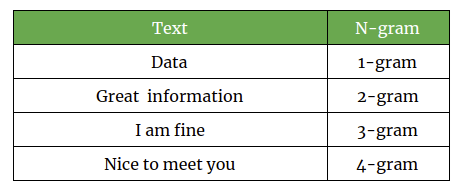

**Why Using N-Grams?**

Sometimes a **single word alone isn’t sufficient to observe the context of a text.** For example, we need to predict the sentiment of the text such as positive or negative: 

- `text = “The Margherita pizza is not bad taste”`

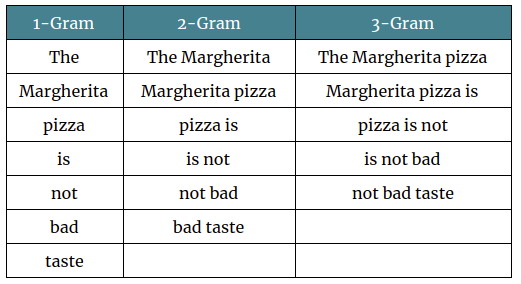
- *Unigram* approach would result in worng sentiment prediction whereas *Bigarm* would allow predicting correctly
- N-grams capture word collocations, no context

**Disadvantages**
- `Context Window Size N:` has to be selected correctly, N is always unknown!
- `Sparsity:`
    - big n-grams result in less features but it increases *sparcity* (unlikely that the same n-gram will appear in another document)
    - worse model performance
- `Words Order:`
    - swaped n-grams are considered distinct
- `Semantic Issues:`
    - no semantic relationships between words. Treat each n-gram independently, no meaning of a word in context.
- `Vocab Growth`:
    - with the increase of n-gram range the vocabulary rapidly grows up!

In practice, it's recommended to try the following n-grams range -> from 2-4

### How to Use N-Grams?
N-grams can be used directly in `CountVectorizer` or in `TfidfVectorizer`. Then we again can count occurance of a N-gram in a text using either Bag of Words or TF-IDF approach.

In [147]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=1.0, # document frequecny
    min_df=1,
    ngram_range=(2,2) # bigrams
)

tfidf_features = tfidf_vectorizer.fit_transform(data_lemmatized['text'])
tfidf_features

<19579x206197 sparse matrix of type '<class 'numpy.float64'>'
	with 235291 stored elements in Compressed Sparse Row format>

- We got much more features (word collacations): `22k` before, `206k` after
- `MIN_DF:` ignore words that have few occurances (noise)
    - define number of documetns or proportion of documents that should contain a word (e.g. 0.25 means -> ignore words that have appeared in 25% of the documents)
- `MAX_DF`: ignore words that a too common
    -  0.85 means -> ignore words appeared in 85% of the documents as they are too common

### Reference
- https://kavita-ganesan.com/how-to-use-countvectorizer/